##Please run the following code in TPU for faster results
###  Click on the drop-down arrow beside Ram-Disk utilization image and change runtime type to TPU v2.

### Installing the DeepXDE Library, we will use this library to implement the DeepONet Framework

In [ ]:
pip install deepxde

### Importing all the required libraries

In [ ]:
import deepxde as dde
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import mean_squared_error
import pandas as pd

### Defining the values of a and T at which we want to evaluate our model

In [ ]:
A=[1.0,1.5,1.8,2.5]
T=[0,0.025,0.05,0.075,0.1]
x_test = np.linspace(0, 2, 100)[:, None]

### Defining the PDE, its boundary conditions, its spatial and temporal domains and the Mean Squared Error (to be used later to evaluate the performance of the model)

In [ ]:
def heat_equation(x, u):
    u_t = dde.grad.jacobian(u, x, i=0, j=1)  # ∂u/∂t
    u_xx = dde.grad.hessian(u, x, component=0, i=0)  # ∂²u/∂x²
    return u_t - u_xx

def boundary_left_right(x, on_boundary):
    return on_boundary and (np.isclose(x[0], 0) or np.isclose(x[0], 2))

geom = dde.geometry.Interval(0, 2)
timedomain = dde.geometry.TimeDomain(0, 0.1)
geomtime = dde.geometry.GeometryXTime(geom, timedomain)
bc = dde.DirichletBC(geomtime, lambda x: 0, boundary_left_right)

def calculate_mse(u_pred, u_true):
    return mean_squared_error(u_true, u_pred)

### Defining the matrix where we'll store MSE for different combinations of a and T values

In [ ]:
error_matrix = pd.DataFrame(index=range(4), columns=range(5))

### Here we define a nested loop, the outer loop for checkpoints for a and inner loop for checkpoints for T. In every loop we define the Initial condition for the model, then train,compile and save the model. Later for all T checkpoints, we plot the graphs of predicted value of energy U(x,t) against x and a particular value of a. Alongside, we also calculate the MSE for the (a,T) combination

Compiling model...
Building feed-forward neural network...
'build' took 0.061862 s

'compile' took 0.624821 s

Training model...

Step      Train loss                        Test loss                         Test metric
0         [1.64e-02, 1.03e-02, 5.52e-01]    [1.64e-02, 1.03e-02, 5.52e-01]    []  
1000      [3.68e-03, 6.16e-03, 4.13e-03]    [3.68e-03, 6.16e-03, 4.13e-03]    []  
2000      [2.44e-02, 2.10e-03, 1.33e-03]    [2.44e-02, 2.10e-03, 1.33e-03]    []  
3000      [8.07e-04, 1.12e-03, 3.32e-04]    [8.07e-04, 1.12e-03, 3.32e-04]    []  
4000      [5.22e-04, 6.98e-04, 1.83e-04]    [5.22e-04, 6.98e-04, 1.83e-04]    []  
5000      [1.31e-03, 4.86e-04, 1.04e-04]    [1.31e-03, 4.86e-04, 1.04e-04]    []  
6000      [1.53e-03, 3.94e-04, 1.15e-04]    [1.53e-03, 3.94e-04, 1.15e-04]    []  
7000      [2.67e-03, 2.91e-04, 1.00e-04]    [2.67e-03, 2.91e-04, 1.00e-04]    []  
8000      [3.81e-04, 1.94e-04, 5.51e-05]    [3.81e-04, 1.94e-04, 5.51e-05]    []  
9000      [2.50e-03, 1.90e-04, 9.

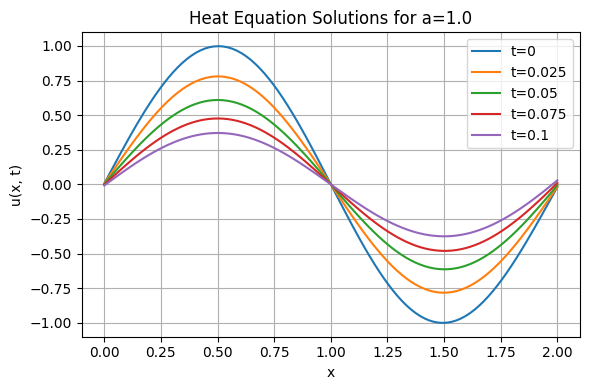

Compiling model...
Building feed-forward neural network...
'build' took 0.061038 s

'compile' took 0.687388 s

Training model...

Step      Train loss                        Test loss                         Test metric
0         [5.68e-02, 4.01e-02, 1.27e+00]    [5.68e-02, 4.01e-02, 1.27e+00]    []  
1000      [3.22e-03, 5.45e-03, 2.21e-03]    [3.22e-03, 5.45e-03, 2.21e-03]    []  
2000      [9.15e-04, 1.29e-03, 3.81e-04]    [9.15e-04, 1.29e-03, 3.81e-04]    []  
3000      [2.55e-03, 7.25e-04, 2.33e-04]    [2.55e-03, 7.25e-04, 2.33e-04]    []  
4000      [4.41e-04, 4.74e-04, 1.92e-04]    [4.41e-04, 4.74e-04, 1.92e-04]    []  
5000      [8.83e-04, 3.26e-04, 1.46e-04]    [8.83e-04, 3.26e-04, 1.46e-04]    []  
6000      [3.79e-03, 2.28e-04, 1.46e-04]    [3.79e-03, 2.28e-04, 1.46e-04]    []  
7000      [1.59e-03, 1.75e-04, 8.71e-05]    [1.59e-03, 1.75e-04, 8.71e-05]    []  
8000      [7.69e-04, 1.27e-04, 7.77e-05]    [7.69e-04, 1.27e-04, 7.77e-05]    []  
9000      [2.03e-04, 1.46e-04, 4.

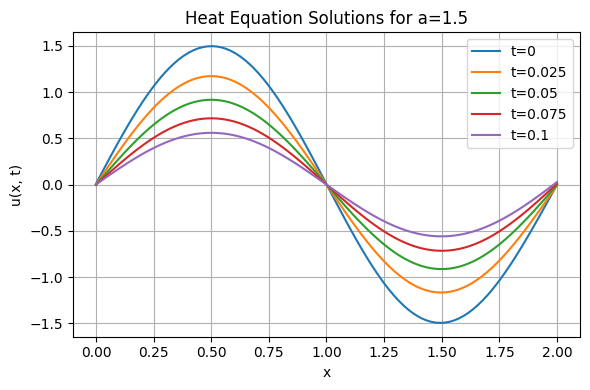

Compiling model...
Building feed-forward neural network...
'build' took 0.062612 s

'compile' took 0.702743 s

Training model...

Step      Train loss                        Test loss                         Test metric
0         [2.28e-02, 1.14e-01, 1.46e+00]    [2.28e-02, 1.14e-01, 1.46e+00]    []  
1000      [1.19e-02, 3.09e-03, 1.28e-03]    [1.19e-02, 3.09e-03, 1.28e-03]    []  
2000      [1.03e-02, 1.34e-03, 8.42e-04]    [1.03e-02, 1.34e-03, 8.42e-04]    []  
3000      [2.23e-03, 1.01e-03, 3.86e-04]    [2.23e-03, 1.01e-03, 3.86e-04]    []  
4000      [5.96e-03, 6.23e-04, 3.91e-04]    [5.96e-03, 6.23e-04, 3.91e-04]    []  
5000      [1.36e-03, 4.96e-04, 2.09e-04]    [1.36e-03, 4.96e-04, 2.09e-04]    []  
6000      [4.14e-04, 4.62e-04, 1.30e-04]    [4.14e-04, 4.62e-04, 1.30e-04]    []  
7000      [1.71e-04, 3.30e-04, 1.13e-04]    [1.71e-04, 3.30e-04, 1.13e-04]    []  
8000      [1.47e-03, 2.55e-04, 1.03e-04]    [1.47e-03, 2.55e-04, 1.03e-04]    []  
9000      [3.48e-04, 2.19e-04, 7.

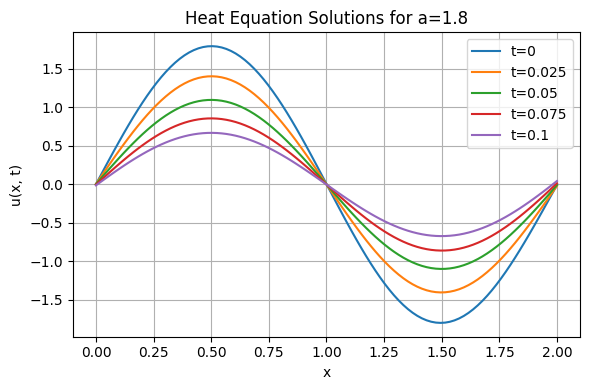

Compiling model...
Building feed-forward neural network...
'build' took 0.060183 s

'compile' took 0.715845 s

Training model...

Step      Train loss                        Test loss                         Test metric
0         [4.23e-03, 5.92e-02, 3.45e+00]    [4.23e-03, 5.92e-02, 3.45e+00]    []  
1000      [6.91e-03, 8.31e-03, 2.89e-03]    [6.91e-03, 8.31e-03, 2.89e-03]    []  
2000      [1.63e-03, 3.46e-03, 1.06e-03]    [1.63e-03, 3.46e-03, 1.06e-03]    []  
3000      [8.53e-04, 2.11e-03, 6.89e-04]    [8.53e-04, 2.11e-03, 6.89e-04]    []  
4000      [9.77e-03, 1.50e-03, 1.20e-03]    [9.77e-03, 1.50e-03, 1.20e-03]    []  
5000      [4.59e-03, 1.03e-03, 3.98e-04]    [4.59e-03, 1.03e-03, 3.98e-04]    []  
6000      [1.51e-03, 8.79e-04, 2.49e-04]    [1.51e-03, 8.79e-04, 2.49e-04]    []  
7000      [1.98e-02, 5.07e-04, 4.82e-04]    [1.98e-02, 5.07e-04, 4.82e-04]    []  
8000      [3.17e-03, 5.35e-04, 1.60e-04]    [3.17e-03, 5.35e-04, 1.60e-04]    []  
9000      [4.71e-03, 3.13e-04, 1.

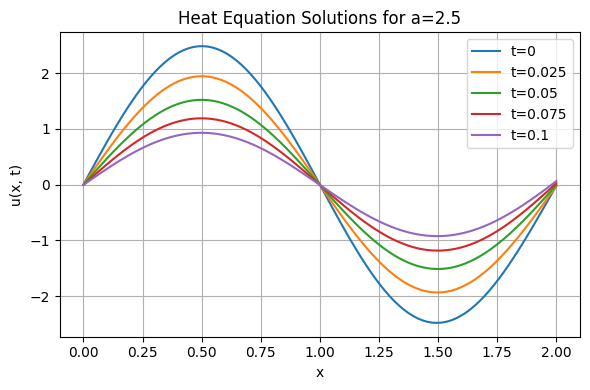

In [ ]:
for row,a in enumerate(A):
  def initial_condition(x):
            return a * np.sin(np.pi * x[:, 0:1])
  ic = dde.IC(geomtime, initial_condition, lambda _, on_initial: on_initial)
  data = dde.data.TimePDE(
        geomtime,
        heat_equation,
        [bc, ic],
        num_domain=4000,
        num_boundary=400,
        num_initial=50,
    )
  net = dde.maps.FNN([2] + [75] * 3 + [1], "tanh", "Glorot normal")
  model = dde.Model(data, net)
  model.compile("adam",lr=1e-3)
  model.train(iterations=10000)
  model_name = f"heat_eq_model_a_{a}.ckpt"
  model.save(model_name)


  plt.figure(figsize=(6, 4))
  for col,t in enumerate(T):
    X_test = np.hstack((x_test, t * np.ones((len(x_test), 1))))
    u_pred = model.predict(X_test).reshape(len(x_test))
    plt.plot(x_test, u_pred, label=f"t={t}")
    error = calculate_mse(u_pred, a * np.sin(np.pi * x_test)* np.exp(-np.pi**2 * t))
    error_matrix.iloc[row, col] = error

    # Customize and show the plot for the current value of 'a'
  plt.title(f"Heat Equation Solutions for a={a}")
  plt.xlabel("x")
  plt.ylabel("u(x, t)")
  plt.legend()
  plt.grid(True)
  plt.tight_layout()
  plt.show()

### The final MSE matrix for differnt combinations of a and T values

In [ ]:
error_matrix.columns = ['T = 0', 'T = 0.025', 'T = 0.05', 'T = 0.075', 'T = 0.1']

# Set row headers
error_matrix.index = ['a = 1.0', 'a = 1.5', 'a = 1.8', 'a = 2.5']

# Display the DataFrame
print(error_matrix)

            T = 0 T = 0.025  T = 0.05 T = 0.075   T = 0.1
a = 1.0  0.000032  0.000022  0.000014  0.000007  0.000038
a = 1.5  0.000089  0.000013  0.000003  0.000004  0.000034
a = 1.8  0.000078  0.000018  0.000007  0.000007  0.000092
a = 2.5   0.00029  0.000111  0.000043  0.000063  0.000249
